In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e17/sample_submission.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")
df_train = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

In [4]:
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df_sample_submission.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [6]:
def summary(df):
    print (f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing'] = df.isnull().sum().values
    summ['%Missing'] = df.isnull().sum().values/len(df)*100
    summ['Unique'] = df.nunique().values
   
    return summ

In [7]:
summary(df_train)

data shape: (136429, 14)


,Data Type,Missing,%Missing,Unique
id,int64,0,0.0,136429
Product ID,object,0,0.0,9976
Type,object,0,0.0,3
Air temperature [K],float64,0,0.0,95
Process temperature [K],float64,0,0.0,81
Rotational speed [rpm],int64,0,0.0,952
Torque [Nm],float64,0,0.0,611
Tool wear [min],int64,0,0.0,246
Machine failure,int64,0,0.0,2
TWF,int64,0,0.0,2


In [8]:
df_train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_train_unique = df_train['Machine failure'].unique()
df_train_unique

array([0, 1])

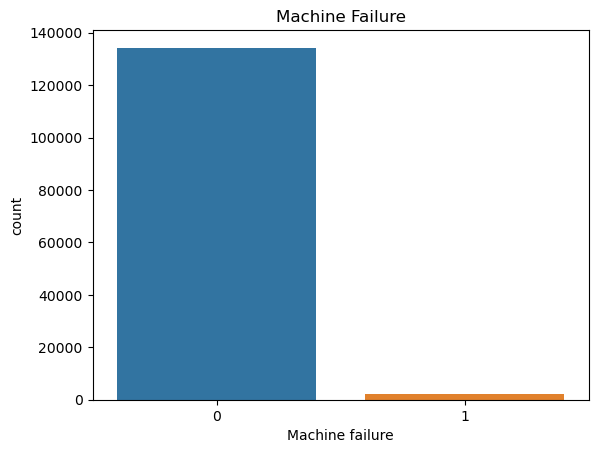

In [10]:
sns.countplot(x='Machine failure', data=df_train)
plt.title('Machine Failure')
plt.show()

In [11]:
df_train_noid = df_train
df_train_noid.drop('id', axis=1, inplace=True)

In [12]:
df_train_noid.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

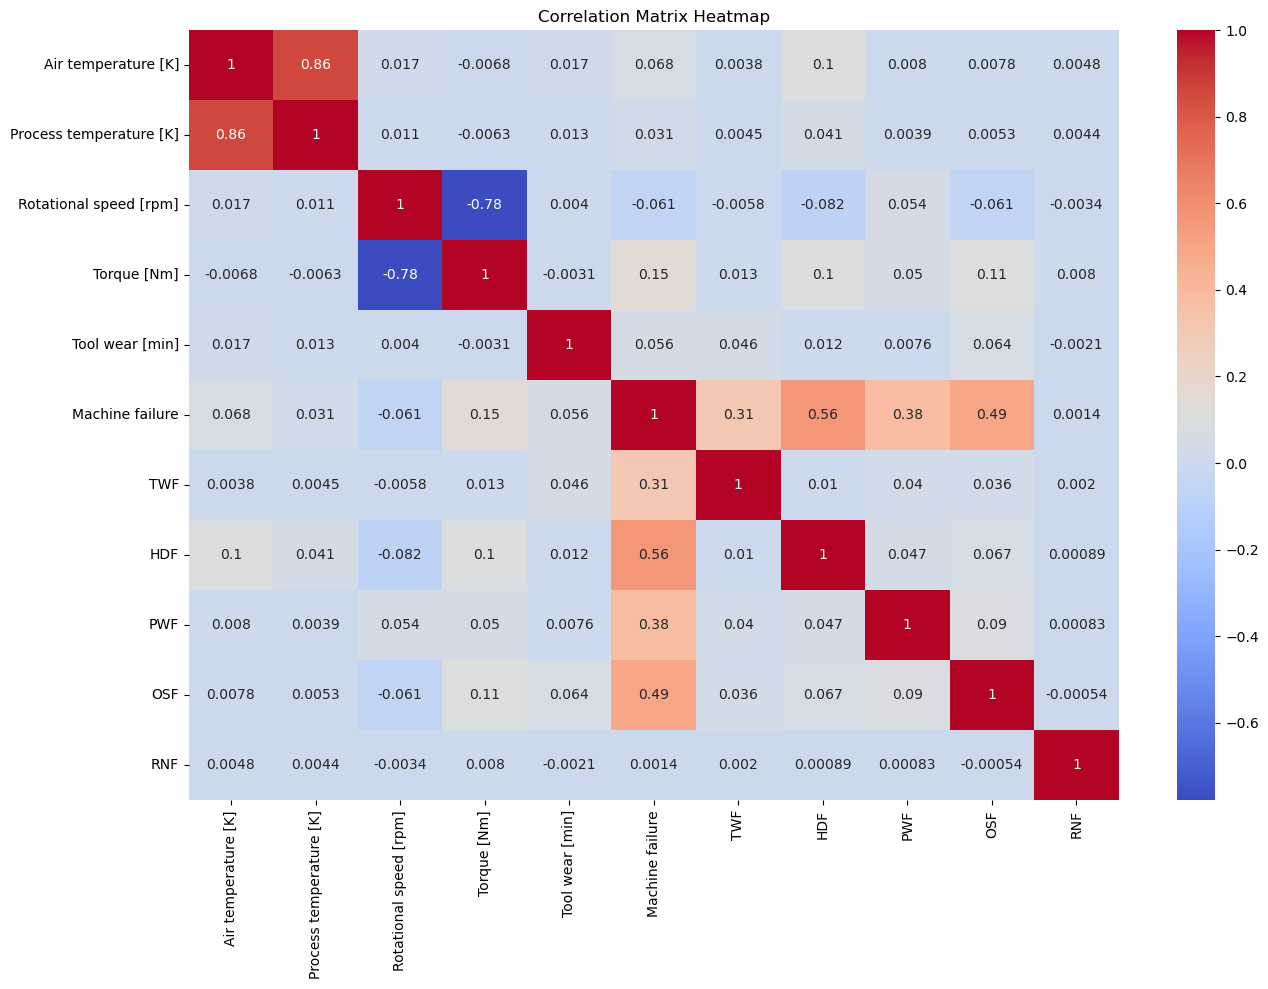

In [13]:
corr_matrix=df_train_noid.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

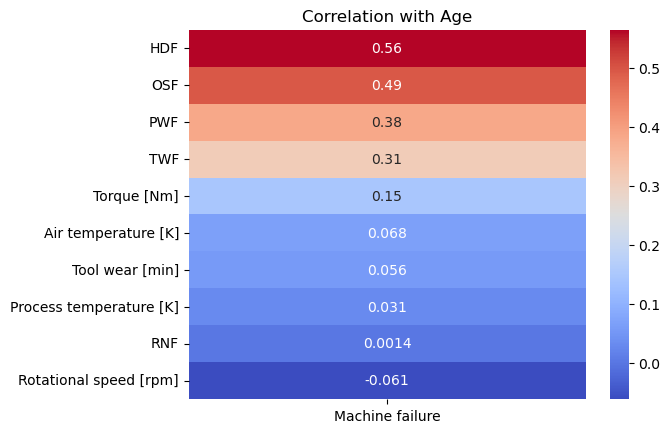

In [14]:
corr_matrix_target=df_train_noid.corr()
target_corr=corr_matrix_target['Machine failure'].drop('Machine failure')
corr_matrix_target_sorted=target_corr.sort_values(ascending=False)

sns.heatmap(corr_matrix_target_sorted.to_frame(), cmap='coolwarm', annot=True)
plt.title('Correlation with Age')
plt.show()